Based on the column names, this dataset appears to contain weather-related data, potentially gathered from a meteorological station or similar source. Here's an interpretation of some of the columns:

https://donneespubliques.meteofrance.fr/client/document/parametres-inclus-dans-les-fichiers-de-donnees-synop_283.pdf

## General Metadata
- numer_sta: Station number or identifier (unique code for a weather station).
- date: Date or timestamp of the observation.

**Pressure**
- pmer: Mean sea-level pressure (hPa).
- pres: Pressure at the station level (hPa).
- niv_bar: Barometric level (could relate to altitude or pressure adjustment level).

**Wind**
- dd: Wind direction (degrees from true north).
- ff: Wind speed (m/s or km/h).
- raf10: Gust speed over the last 10 minutes (m/s or km/h).
- rafper: Period of gust measurement.

**Pressure and Humidity**
- u: Relative humidity (%).
- tend: Pressure tendency (hPa, indicating rising or falling pressure).
- cod_tend: Code for pressure tendency (categorical representation).
- pres: Pressure at the station level (hPa).
- niv_bar: Barometric level (could relate to altitude or pressure adjustment level).

**Visibility, Weather and Precipitation**
- vv: Horizontal visibility (meters or kilometers).
- ww: Current weather (coded representation, e.g., fog, rain, snow).
- w1, w2: Past weather codes (e.g., previous rain, fog, etc.).
- phenspe1-phenspe4: Special phenomena (e.g., thunderstorms, hail).
- rr1: Precipitation in the last 1 hour (mm).
- rr3, rr6, rr12, rr24: Precipitation over the last 3, 6, 12, and 24 hours (mm).
- ssfrai: Fresh snowfall amount (mm or cm).
- perssfrai: Period of fresh snowfall.
- etat_sol: Surface condition (e.g., dry, wet, icy, snow-covered).
- ht_neige: Snow height (cm or mm).
- geop: Geopotential height (used for pressure levels in meteorology).


**Clouds**
- n: Total cloud cover (eighths or oktas of the sky).
- nbas: Total cloud cover of the base.
- hbas: Cloud base height.
- cl, cm, ch: Low, medium, and high cloud cover types (coded).
- nnuage1-nnuage4: Cloud amount for specific cloud layers (e.g., oktas).
- ctype1-ctype4: Cloud types for specific layers (e.g., cumulus, cirrus).
- hnuage1-hnuage4: Heights of specific cloud layers (meters).

**Temperature**
- t: Air temperature (°C).
- td: Dew point temperature (°C).
- tend24: 24-hour temperature tendency.
- tn12, tn24: Minimum temperature over 12 and 24 hours (°C).
- tx12, tx24: Maximum temperature over 12 and 24 hours (°C).
- tminsol: Minimum temperature at the surface or soil (°C).

**Radiation**
- sw: Shortwave radiation (incoming solar energy).
- tw: Wet bulb temperature (°C).

In [399]:
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sn

### Correlation Function

In [400]:
def correlation(dataframe):
    dataframe2 = dataframe.drop(columns=["date"])
    corrMatt = dataframe2.corr()
    mask = np.triu(np.ones_like(corrMatt, dtype=bool))
    fig,ax= plt.subplots()
    fig.set_size_inches(20, 10)
    print(sn.heatmap(corrMatt, mask=mask,vmin=-1, vmax=1, square=True,annot=True))

In [401]:
data = pd.read_parquet(Path("data") / "final_test.parquet")
data.head()

,counter_id,counter_name,site_id,site_name,date,counter_installation_date,coordinates,counter_technical_id,latitude,longitude
0,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,2021-09-10 01:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429
1,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,2021-09-10 13:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429
2,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,2021-09-10 17:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429
3,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,2021-09-10 19:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429
4,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,2021-09-10 22:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429


### External Data

In [402]:
df_external = pd.read_csv(Path("external_data") / "external_data.csv")

In [403]:
df_external['date'] = pd.to_datetime(df_external['date'])

In [404]:
df_external.dtypes

numer_sta             int64
date         datetime64[ns]
pmer                  int64
tend                  int64
cod_tend              int64
dd                    int64
ff                  float64
t                   float64
td                  float64
u                     int64
vv                    int64
ww                    int64
w1                  float64
w2                  float64
n                   float64
nbas                float64
hbas                float64
cl                  float64
cm                  float64
ch                  float64
pres                  int64
niv_bar             float64
geop                float64
tend24              float64
tn12                float64
tn24                float64
tx12                float64
tx24                float64
tminsol             float64
sw                  float64
tw                  float64
raf10               float64
rafper              float64
per                   int64
etat_sol            float64
ht_neige            

In [405]:
df_external.columns

Index(['numer_sta', 'date', 'pmer', 'tend', 'cod_tend', 'dd', 'ff', 't', 'td',
       'u', 'vv', 'ww', 'w1', 'w2', 'n', 'nbas', 'hbas', 'cl', 'cm', 'ch',
       'pres', 'niv_bar', 'geop', 'tend24', 'tn12', 'tn24', 'tx12', 'tx24',
       'tminsol', 'sw', 'tw', 'raf10', 'rafper', 'per', 'etat_sol', 'ht_neige',
       'ssfrai', 'perssfrai', 'rr1', 'rr3', 'rr6', 'rr12', 'rr24', 'phenspe1',
       'phenspe2', 'phenspe3', 'phenspe4', 'nnuage1', 'ctype1', 'hnuage1',
       'nnuage2', 'ctype2', 'hnuage2', 'nnuage3', 'ctype3', 'hnuage3',
       'nnuage4', 'ctype4', 'hnuage4'],
      dtype='object')

## Wind
- dd: Wind direction (degrees from true north) in the last 10min.
- ff: Wind speed (m/s or km/h) in the last 10min.
- raf10: Gust speed over the last 10 minutes (m/s or km/h).
- rafper: Gust over a period of time (probably this hour).
- per: period of measurment

In [406]:
df_wind = df_external[["date", "dd", "ff", "raf10", "rafper"]]

In [407]:
df_wind

,date,dd,ff,raf10,rafper
0,2021-01-01 00:00:00,270,1.8,2.5,2.5
1,2021-01-01 03:00:00,300,1.7,2.2,2.2
2,2021-01-01 06:00:00,290,2.6,3.2,3.2
3,2021-01-01 09:00:00,280,1.7,2.3,2.3
4,2021-01-01 12:00:00,50,1.0,2.5,4.4
...,...,...,...,...,...
3317,2020-09-30 09:00:00,230,4.4,7.1,7.1
3318,2020-09-30 12:00:00,190,4.9,7.2,7.2
3319,2020-09-30 15:00:00,190,4.1,6.4,8.4
3320,2020-09-30 18:00:00,190,2.7,4.3,5.2


In [408]:
df_wind = df_wind.drop(columns=["dd"])

In [409]:
df_wind.corr()

,date,ff,raf10,rafper
date,1.000000,-0.053158,-0.048197,-0.034435
ff,-0.053158,1.000000,0.972878,0.923972
raf10,-0.048197,0.972878,1.000000,0.943663
rafper,-0.034435,0.923972,0.943663,1.000000


Axes(0.36,0.11;0.385x0.77)


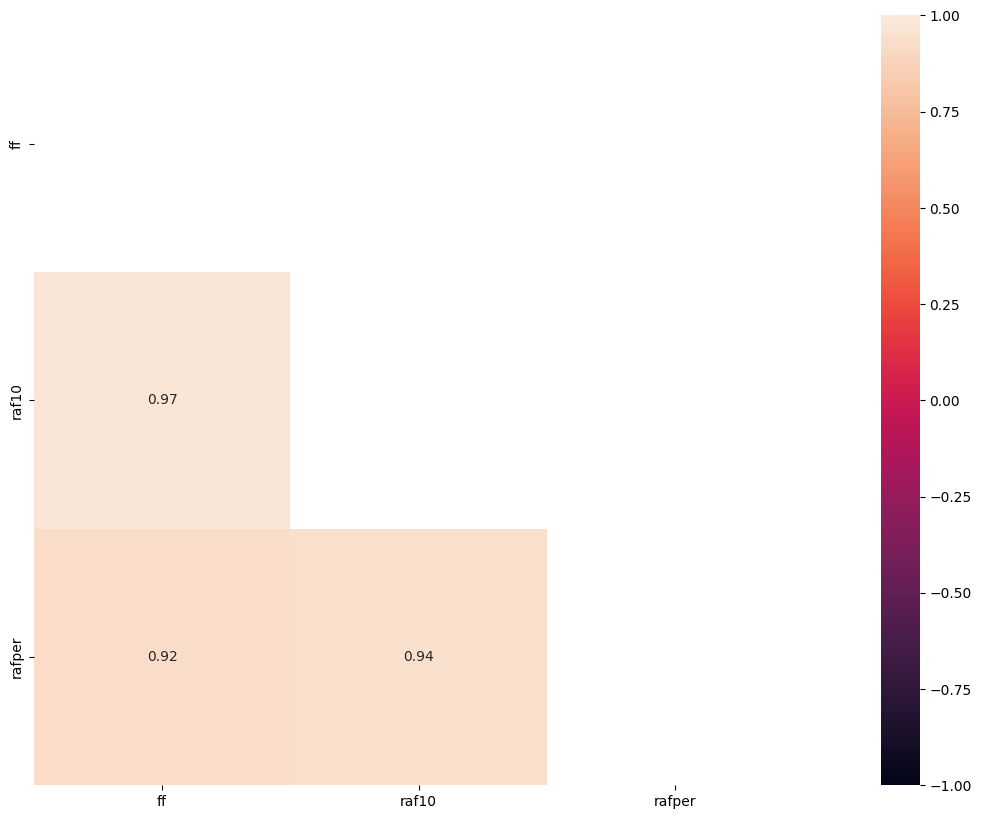

In [410]:
correlation(df_wind)

Let us keep only column ff as the other ones are highly correlated. 

In [460]:
df_wind = df_external[["date", "ff"]]
df_wind

,date,ff
0,2021-01-01 00:00:00,1.8
1,2021-01-01 03:00:00,1.7
2,2021-01-01 06:00:00,2.6
3,2021-01-01 09:00:00,1.7
4,2021-01-01 12:00:00,1.0
...,...,...
3317,2020-09-30 09:00:00,4.4
3318,2020-09-30 12:00:00,4.9
3319,2020-09-30 15:00:00,4.1
3320,2020-09-30 18:00:00,2.7


## Pressure and Humidity
- u: Relative humidity (%).
- tend: Pressure tendency in the last 3h (hPa, indicating rising or falling pressure).
- cod_tend: Code for pressure tendency (categorical representation).
- pres: Pressure at the station level (hPa) --> the higher, the better
- niv_bar: Barometric level (could relate to altitude or pressure adjustment level).


**WMO code 0200: Characteristic of pressure tendency.**

0. Increasing, then decreasing : atmospheric pressure the same as or higher than 3 hrs ago
1. Increasing, then steady : atmospheric pressure now higher than 3 hrs ago
2. Increasing (steadily or unsteadily) : atmospheric pressure now higher than 3 hrs ago
3. Decreasing or steady, then increasing; or increasing, then increasing more rapidly : atmospheric pressure now higher than 3 hrs ago
4. Steady : atmospheric pressure the same as 3 hrs ago
5. Decreasing, then increasing : atmospheric pressure the same as or lower than 3 hrs ago
6. Decreasing, then steady; or decreasing then decreasing more slowly : atmospheric pressure now lower than 3 hrs ago
7. Decreasing (steadily or unsteadily) : atmospheric pressure now lower than 3 hrs ago
8. Steady or increasing, then decreasing; or decreasing, then decreasing more rapidly : atmospheric pressure now lower than 3 hrs ago 

In [412]:
df_humidity = df_external[["date", "pres", "niv_bar", "u", "tend", "cod_tend"]]
print(df_humidity['niv_bar']) # Let's drop it
df_humidity = df_humidity.drop(columns=['niv_bar'])

df_humidity

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
3317   NaN
3318   NaN
3319   NaN
3320   NaN
3321   NaN
Name: niv_bar, Length: 3322, dtype: float64


,date,pres,u,tend,cod_tend
0,2021-01-01 00:00:00,99680,96,80,1
1,2021-01-01 03:00:00,99790,98,110,3
2,2021-01-01 06:00:00,99820,98,30,3
3,2021-01-01 09:00:00,99970,97,150,2
4,2021-01-01 12:00:00,100000,82,30,0
...,...,...,...,...,...
3317,2020-09-30 09:00:00,100480,82,-30,8
3318,2020-09-30 12:00:00,100270,66,-210,8
3319,2020-09-30 15:00:00,100090,72,-180,7
3320,2020-09-30 18:00:00,99960,73,-130,6


Axes(0.36,0.11;0.385x0.77)


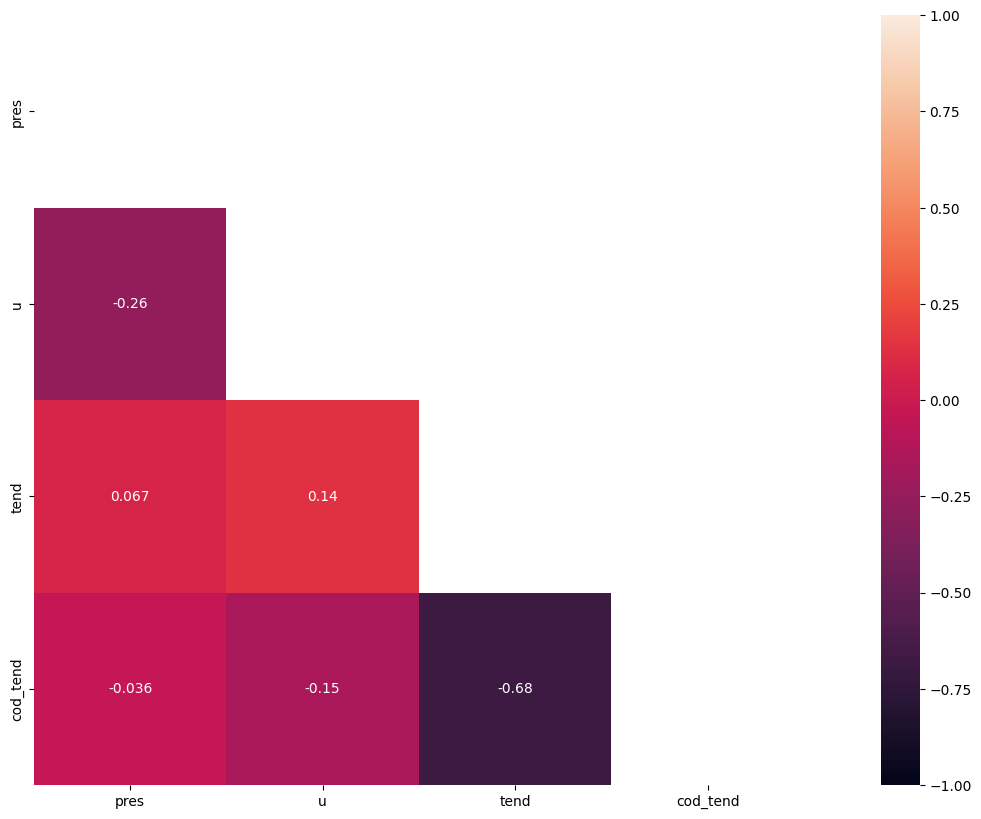

In [413]:
correlation(df_humidity)

Let us keep all of them as they seem uncorrelated.

## Visibility, Weather and Precipitation
- vv: Horizontal visibility (meters or kilometers). mean done
- ww: Current weather (coded representation, e.g., fog, rain, snow). see with the code
- w1, w2: Past weather codes (e.g., previous rain, fog, etc.). see with the code
- phenspe1-phenspe4: Special phenomena (e.g., thunderstorms, hail). removed
- rr1: Precipitation in the last 1 hour (mm). mean done
- rr3, rr6, rr12, rr24: Precipitation over the last 3, 6, 12, and 24 hours (mm). mean done
- ssfrai: Fresh snowfall amount (mm or cm). 0 fait
- perssfrai: Period of fresh snowfall. removed
- etat_sol: Surface condition (e.g., dry, wet, icy, snow-covered). see with the code
- ht_neige: Snow height (cm or mm). 0 fait
- geop: Geopotential height (used for pressure levels in meteorology). removed

In [414]:
df_weather = df_external[["date", "vv", "ww", "w1", "w2", "phenspe1", "phenspe2", "phenspe3", "phenspe4", 
                         "rr1", "rr3", "rr6", "rr12", "rr24", "ssfrai", "perssfrai", "etat_sol", "ht_neige", "geop"]]

In [415]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3322 entries, 0 to 3321
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       3322 non-null   datetime64[ns]
 1   vv         3322 non-null   int64         
 2   ww         3322 non-null   int64         
 3   w1         3315 non-null   float64       
 4   w2         3312 non-null   float64       
 5   phenspe1   0 non-null      float64       
 6   phenspe2   0 non-null      float64       
 7   phenspe3   0 non-null      float64       
 8   phenspe4   0 non-null      float64       
 9   rr1        3313 non-null   float64       
 10  rr3        3316 non-null   float64       
 11  rr6        3306 non-null   float64       
 12  rr12       3300 non-null   float64       
 13  rr24       3298 non-null   float64       
 14  ssfrai     2877 non-null   float64       
 15  perssfrai  2877 non-null   float64       
 16  etat_sol   3270 non-null   float64       


In [416]:
df_weather["w2"].unique()

array([ 0.,  1.,  2.,  5.,  7.,  6.,  8., nan,  4.,  9.])

Let's drop the columns that are empty. 

In [417]:
df_weather = df_weather.drop(columns=["phenspe1", "phenspe2", "phenspe3", "phenspe4", "geop"])
df_weather = df_weather.drop(columns=["perssfrai"]) # drop this columns as we don't understand it

Let's study the NaN values of the snow related columns.

                    date  ssfrai  ht_neige
6    2021-01-01 18:00:00     NaN       0.0
9    2021-01-02 03:00:00     0.0       NaN
10   2021-01-02 06:00:00     0.0       NaN
11   2021-01-02 09:00:00     0.0       NaN
31   2021-01-04 21:00:00     NaN       0.0
...                  ...     ...       ...
3290 2020-09-27 00:00:00     NaN       0.0
3301 2020-09-28 09:00:00     NaN       0.0
3302 2020-09-28 12:00:00     NaN       0.0
3307 2020-09-29 03:00:00     NaN       0.0
3309 2020-09-29 09:00:00     NaN       0.0

[449 rows x 3 columns]


C:\Users\comem\AppData\Local\Temp\ipykernel_11544\921677816.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_snow2["week"] = df_snow2["date"].dt.to_period("W")


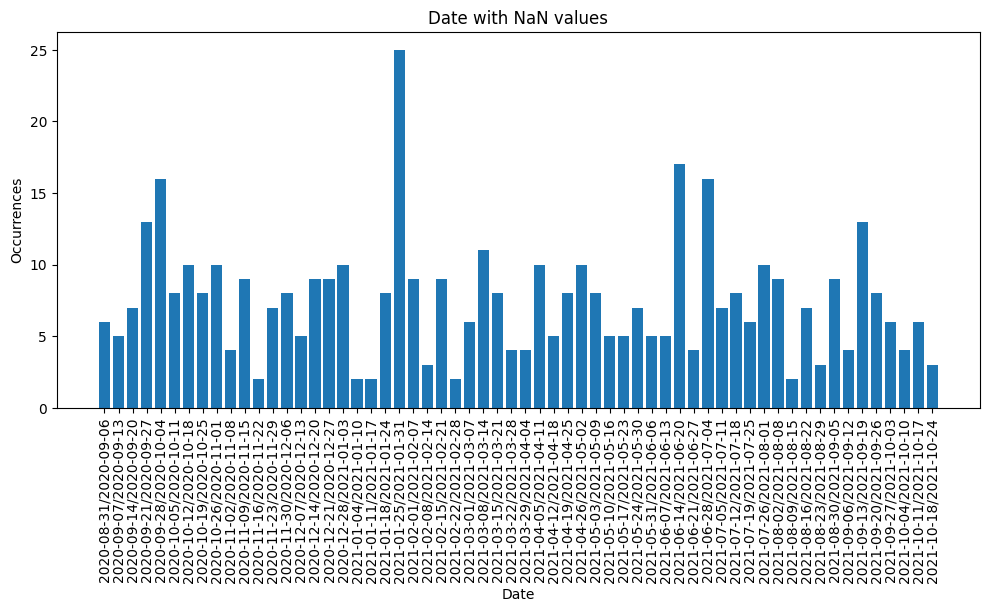

In [418]:
df_snow = df_weather[["date", "ssfrai", "ht_neige"]]

df_snow2 = df_snow[df_snow.isna().any(axis=1)]
print(df_snow2)
df_snow2["week"] = df_snow2["date"].dt.to_period("W")

date_counts = df_snow2['week'].value_counts().sort_index()


plt.figure(figsize=(10, 6))
plt.bar(date_counts.index.astype(str), date_counts.values)
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.ylabel('Occurrences')
plt.tight_layout()
plt.title('Date with NaN values')
plt.show()

As the snow is a rare event, let's replace the NaN values by 0, which indicates that there is no snow. 

In [419]:
df_snow

,date,ssfrai,ht_neige
0,2021-01-01 00:00:00,0.00,0.00
1,2021-01-01 03:00:00,0.00,0.00
2,2021-01-01 06:00:00,0.00,0.00
3,2021-01-01 09:00:00,0.01,0.01
4,2021-01-01 12:00:00,0.00,-0.01
...,...,...,...
3317,2020-09-30 09:00:00,0.00,0.00
3318,2020-09-30 12:00:00,0.00,0.00
3319,2020-09-30 15:00:00,0.00,0.00
3320,2020-09-30 18:00:00,0.00,0.00


In [420]:
df_weather[["ssfrai", "ht_neige", ]] = df_weather[["ssfrai", "ht_neige"]].fillna(0)

Let's replace the NaN values of the precipitations columns by the mean. So we have a minimum bias impact on the dataframe.

In [421]:
df_weather[["rr1", "rr3", "rr6", "rr12", "rr24", "vv"]] = df_weather[["rr1", "rr3", "rr6", "rr12", "rr24", "vv"]].fillna(
    df_weather[["rr1", "rr3", "rr6", "rr12", "rr24", "vv"]].mean())

In [422]:
df_weather[["rr1", "rr3", "rr6", "rr12", "rr24", "vv"]].describe()

,rr1,rr3,rr6,rr12,rr24,vv
count,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000,3322.000000
mean,0.078599,0.241556,0.493406,0.994970,2.002032,20142.338952
std,0.505761,1.059033,1.707743,2.709488,4.177010,10283.556918
min,-0.100000,-0.100000,-0.100000,-0.100000,-0.100000,120.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,12710.000000
50%,0.000000,0.000000,0.000000,0.000000,0.200000,20000.000000
75%,0.000000,0.000000,0.000000,0.600000,2.002032,25000.000000
max,14.900000,20.100000,23.700000,33.600000,40.300000,60000.000000


We can notice there is no impact on the mean.

Let us now change the NaN values of the weather and surface condition by the most common value (as it is categorical).

In [423]:
df_weather[["ww", "w1", "w2", "etat_sol"]].columns

Index(['ww', 'w1', 'w2', 'etat_sol'], dtype='object')

In [424]:
for column in df_weather[["ww", "w1", "w2", "etat_sol"]].columns:
    mode = df_weather[column].mode()[0]  
    df_weather[column].fillna(mode, inplace=True)

C:\Users\comem\AppData\Local\Temp\ipykernel_11544\483199831.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_weather[column].fillna(mode, inplace=True)


Now we don't have any NaN values anymore, let us study the categorical features ww. The issue is that this category is not obviously sorted and that could have a negative impact on the dataframe. 

Concerning w1 and w2 they are sorted in a logical order (0 is sunny weather and 9 is thunderstorm).

In [425]:
df_weather[["ww", "w1", "w2", "etat_sol"]].dtypes

ww            int64
w1          float64
w2          float64
etat_sol    float64
dtype: object

### Merging the codes with df_weather

In [426]:
code_ww = pd.read_csv(Path("external_data") / "Code 4677 ww weather.csv", encoding='ISO-8859-1', delimiter=';')
code_w1_w2 = pd.read_csv(Path("external_data") / "WMO Code 4561 Past weather w1 and w2.csv", encoding='ISO-8859-1', delimiter=';')

In [427]:
code_ww

,ww,ww description
0,0,Cloud development not observed or not observable
1,1,Clouds generally dissolving or becoming less d...
2,2,State of sky on the whole unchanged
3,3,Clouds generally forming or developing
4,4,"Visibility reduced by smoke, e.g. veldt or for..."
...,...,...
95,95,"Thunderstorm, slight or moderate, without hail..."
96,96,"Thunderstorm, slight or moderate, with hail** ..."
97,97,"Thunderstorm, heavy, without hail**Â but with ..."
98,98,Thunderstorm combined with duststorm or sandst...


In [428]:
df_weather = df_weather.merge(code_ww, on="ww", how="left")


In [429]:
df_weather.head()

,date,vv,ww,w1,w2,rr1,rr3,rr6,rr12,rr24,ssfrai,etat_sol,ht_neige,ww description
0,2021-01-01 00:00:00,990,2,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.00,1.0,0.00,State of sky on the whole unchanged
1,2021-01-01 03:00:00,210,40,0.0,0.0,0.0,0.0,0.0,0.0,1.2,0.00,1.0,0.00,Fog or ice fog at a distance at the time of ob...
2,2021-01-01 06:00:00,3660,3,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.00,1.0,0.00,Clouds generally forming or developing
3,2021-01-01 09:00:00,3500,10,1.0,1.0,0.0,0.2,0.2,0.2,0.2,0.01,13.0,0.01,Mist
4,2021-01-01 12:00:00,8000,2,2.0,2.0,0.0,0.0,0.2,0.2,0.2,0.00,11.0,-0.01,State of sky on the whole unchanged


In [430]:
df_weather["etat_sol"].value_counts()

etat_sol
0.0     2248
1.0      626
2.0      369
4.0       27
15.0      21
16.0      17
11.0       6
13.0       5
12.0       3
Name: count, dtype: int64

Text(0.5, 1.0, 'Répartition des états du sol dans les données météo')

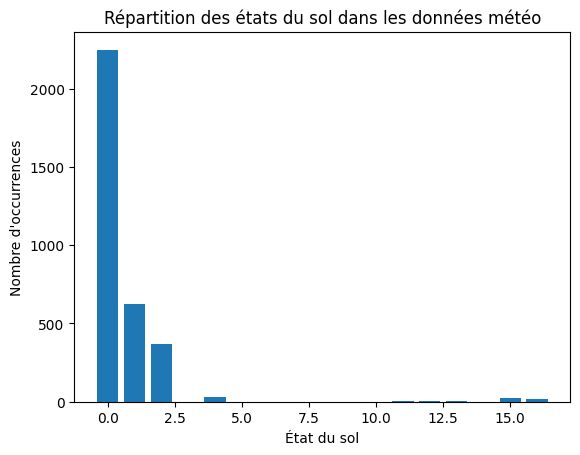

In [431]:
counts = df_weather["etat_sol"].value_counts()


plt.bar(counts.index, counts.values)
plt.xlabel("État du sol")
plt.ylabel("Nombre d'occurrences")
plt.title("Répartition des états du sol dans les données météo")

Concerning etat_sol, in our model, we will use a one hot encoder on modalities 0, 1, 2 and 4 corresponding to ground dry, ground moist, ground wet and ground frozen. 

For w1 and w2 they are already ordinal encoders. 

For ww, we will use a table vectorizer to group them by proximity. 

### Now let's study the correlations between the features of df_weather

Axes(0.36,0.11;0.385x0.77)


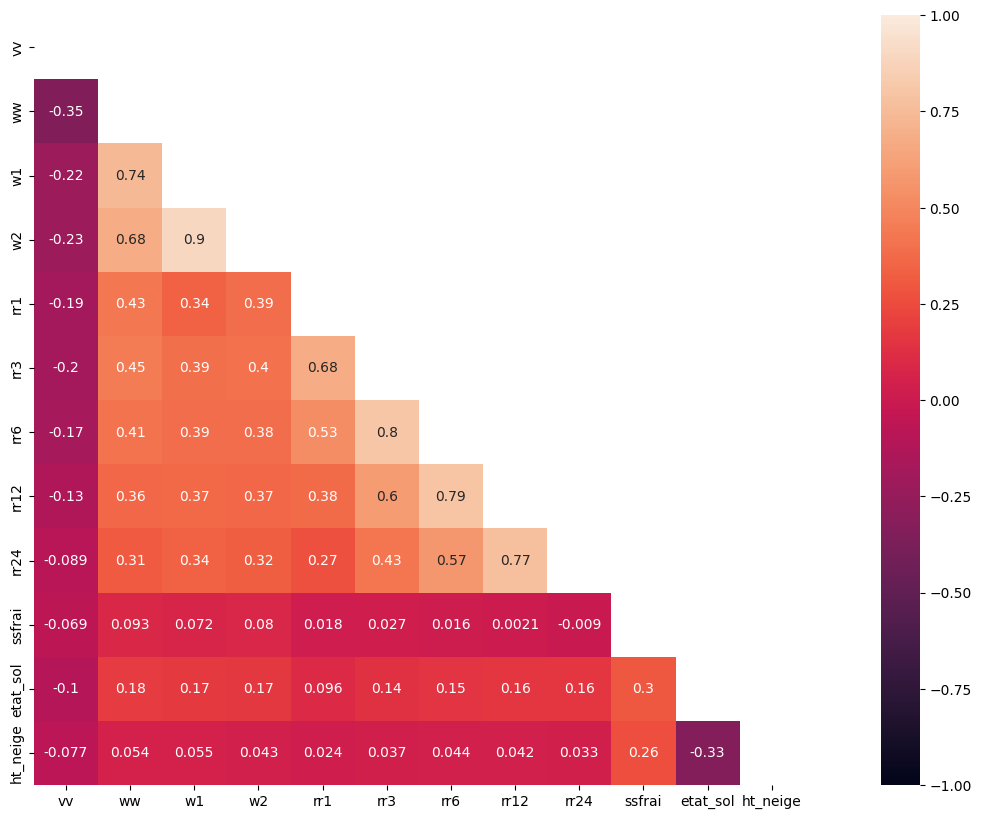

In [432]:
df_weather_numeric = df_weather.drop(columns=["ww description"])
correlation(df_weather_numeric)

None of them is correlated enought to remove it from the dataframe.

## Clouds
- n: Total cloud cover (eighths or oktas of the sky) in %.
- nbas: Total cloud cover of the base in Octa.
- hbas: Cloud base height.
- cl, cm, ch: Low, medium, and high cloud cover types (coded).
- nnuage1-nnuage4: Cloud amount for specific cloud layers (e.g., oktas).
- ctype1-ctype4: Cloud types for specific layers (e.g., cumulus, cirrus).
- hnuage1-hnuage4: Heights of specific cloud layers (meters).

In [433]:
df_clouds = df_external[["date", "n", "nbas", "hbas", "cl", "cm", "ch", "nnuage1", "nnuage2", "nnuage3", "nnuage4", 
                        "ctype1", "ctype2", "ctype3", "ctype4", "hnuage1", "hnuage2", "hnuage3", "hnuage4"]]

df_clouds.head()

,date,n,nbas,hbas,cl,cm,ch,nnuage1,nnuage2,nnuage3,nnuage4,ctype1,ctype2,ctype3,ctype4,hnuage1,hnuage2,hnuage3,hnuage4
0,2021-01-01 00:00:00,10.0,1.0,800.0,35.0,20.0,10.0,1.0,NaN,NaN,NaN,6.0,NaN,NaN,NaN,600.0,NaN,NaN,NaN
1,2021-01-01 03:00:00,25.0,1.0,1750.0,35.0,23.0,10.0,1.0,2.0,NaN,NaN,6.0,3.0,NaN,NaN,1500.0,3000.0,NaN,NaN
2,2021-01-01 06:00:00,90.0,5.0,450.0,35.0,27.0,NaN,3.0,4.0,6.0,NaN,6.0,6.0,3.0,NaN,480.0,2000.0,3000.0,NaN
3,2021-01-01 09:00:00,50.0,1.0,1750.0,35.0,23.0,NaN,1.0,3.0,NaN,NaN,6.0,3.0,NaN,NaN,1740.0,2800.0,NaN,NaN
4,2021-01-01 12:00:00,90.0,7.0,450.0,38.0,NaN,NaN,1.0,4.0,7.0,NaN,8.0,6.0,6.0,NaN,330.0,570.0,810.0,NaN


In [434]:
df_clouds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3322 entries, 0 to 3321
Data columns (total 19 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     3322 non-null   datetime64[ns]
 1   n        3166 non-null   float64       
 2   nbas     3317 non-null   float64       
 3   hbas     2869 non-null   float64       
 4   cl       2909 non-null   float64       
 5   cm       1941 non-null   float64       
 6   ch       1678 non-null   float64       
 7   nnuage1  2873 non-null   float64       
 8   nnuage2  1695 non-null   float64       
 9   nnuage3  618 non-null    float64       
 10  nnuage4  42 non-null     float64       
 11  ctype1   2524 non-null   float64       
 12  ctype2   1443 non-null   float64       
 13  ctype3   470 non-null    float64       
 14  ctype4   87 non-null     float64       
 15  hnuage1  2867 non-null   float64       
 16  hnuage2  1695 non-null   float64       
 17  hnuage3  618 non-null    float64 

In [435]:
df_clouds = df_clouds.drop(columns=["nnuage2", "nnuage3", "nnuage4", "ctype2", "ctype3", "ctype4",
                           'hnuage2', "hnuage3", "hnuage4", 'ch', 'cm'])

df_clouds.head()

,date,n,nbas,hbas,cl,nnuage1,ctype1,hnuage1
0,2021-01-01 00:00:00,10.0,1.0,800.0,35.0,1.0,6.0,600.0
1,2021-01-01 03:00:00,25.0,1.0,1750.0,35.0,1.0,6.0,1500.0
2,2021-01-01 06:00:00,90.0,5.0,450.0,35.0,3.0,6.0,480.0
3,2021-01-01 09:00:00,50.0,1.0,1750.0,35.0,1.0,6.0,1740.0
4,2021-01-01 12:00:00,90.0,7.0,450.0,38.0,1.0,8.0,330.0


Axes(0.36,0.11;0.385x0.77)


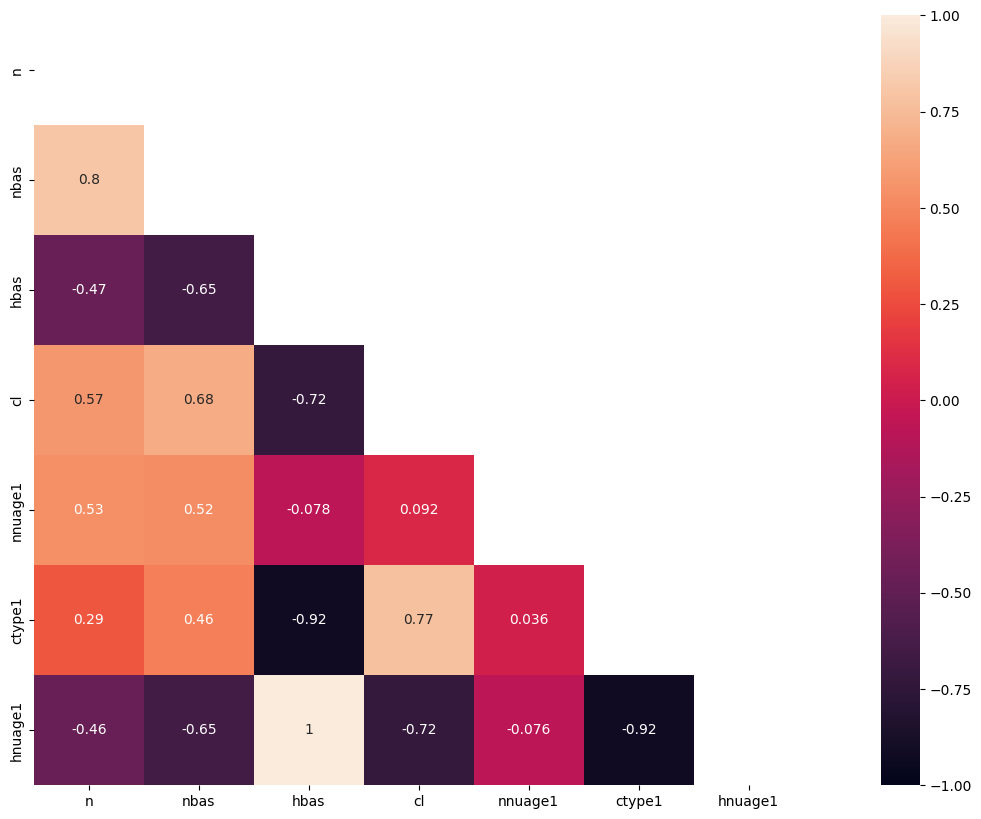

In [436]:
correlation(df_clouds)

In [437]:
df_clouds = df_clouds.drop(columns=["hnuage1", "ctype1", "nnuage1", "cl"])

We remove the features concerning the different types of clouds and their high as ther is too much NaN value and as they are strongly correlated to hbas.

In [438]:
df_clouds.describe()

,date,n,nbas,hbas
count,3322,3166.000000,3317.000000,2869.000000
mean,2021-03-27 18:37:39.482239488,65.213519,3.873681,2047.176717
min,2020-09-01 00:00:00,0.000000,0.000000,30.000000
25%,2020-12-13 18:45:00,40.000000,1.000000,450.000000
50%,2021-03-27 19:30:00,90.000000,4.000000,1250.000000
75%,2021-07-09 17:15:00,90.000000,7.000000,2250.000000
max,2021-10-21 12:00:00,101.000000,9.000000,9000.000000
std,NaN,36.203443,3.074275,2365.880033


Let's see how are organized the features to fill the NaN values.

In [439]:
print(df_clouds["n"].unique())
print(df_clouds["nbas"].unique())
print(df_clouds["hbas"].unique())

[ 10.  25.  90.  50. 100.  60.   0.  40.  75.  nan 101.]
[ 1.  5.  7.  0.  3.  6.  8.  4.  2. nan  9.]
[ 800. 1750.  450. 2250.   nan 7000.  150.  250. 1250. 5400. 5800. 3700.
 3000. 2760. 2600. 5300. 3600. 4100.   80. 4440. 8000. 6000. 4500. 2500.
 3400. 3200. 3100. 6700. 7400. 7800. 4600. 4300. 4140. 7500. 7200. 6600.
 6400. 3300. 4000. 2800. 5700. 6100. 2520. 6650. 5500. 6500. 3630. 2700.
 7380. 4400. 4800. 7140. 4200. 5600. 5000. 2940. 3800. 4320. 6060. 3900.
 3060. 3720. 4980. 2580. 3500. 6800. 2550. 3240. 2900. 5340. 3050. 2570.
 3360. 4920. 8500. 9000. 4620. 6300.   30. 2730. 5750. 6200. 5100. 2670.
 2750. 2640. 4310. 2770. 3370. 5640. 6540. 7260. 3930. 2820. 5900. 5570.
 6960. 3780.]


In [440]:
for col in df_clouds.columns:
    if df_clouds[col].isna().any():  
        mean_value = df_clouds[col].mean(skipna=True) 
        rounded_mean = round(mean_value)  
        df_clouds[col].fillna(rounded_mean, inplace=True) 
df_clouds

C:\Users\comem\AppData\Local\Temp\ipykernel_11544\2176780506.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clouds[col].fillna(rounded_mean, inplace=True)


,date,n,nbas,hbas
0,2021-01-01 00:00:00,10.0,1.0,800.0
1,2021-01-01 03:00:00,25.0,1.0,1750.0
2,2021-01-01 06:00:00,90.0,5.0,450.0
3,2021-01-01 09:00:00,50.0,1.0,1750.0
4,2021-01-01 12:00:00,90.0,7.0,450.0
...,...,...,...,...
3317,2020-09-30 09:00:00,90.0,7.0,450.0
3318,2020-09-30 12:00:00,90.0,7.0,800.0
3319,2020-09-30 15:00:00,90.0,7.0,800.0
3320,2020-09-30 18:00:00,100.0,8.0,2250.0


In [441]:
print(df_clouds["n"].unique())
print(df_clouds["nbas"].unique())
print(df_clouds["hbas"].unique())

[ 10.  25.  90.  50. 100.  60.   0.  40.  75.  65. 101.]
[1. 5. 7. 0. 3. 6. 8. 4. 2. 9.]
[ 800. 1750.  450. 2250. 2047. 7000.  150.  250. 1250. 5400. 5800. 3700.
 3000. 2760. 2600. 5300. 3600. 4100.   80. 4440. 8000. 6000. 4500. 2500.
 3400. 3200. 3100. 6700. 7400. 7800. 4600. 4300. 4140. 7500. 7200. 6600.
 6400. 3300. 4000. 2800. 5700. 6100. 2520. 6650. 5500. 6500. 3630. 2700.
 7380. 4400. 4800. 7140. 4200. 5600. 5000. 2940. 3800. 4320. 6060. 3900.
 3060. 3720. 4980. 2580. 3500. 6800. 2550. 3240. 2900. 5340. 3050. 2570.
 3360. 4920. 8500. 9000. 4620. 6300.   30. 2730. 5750. 6200. 5100. 2670.
 2750. 2640. 4310. 2770. 3370. 5640. 6540. 7260. 3930. 2820. 5900. 5570.
 6960. 3780.]


## Temperature
- t: Air temperature (°C).
- td: Dew point temperature (°C).
- tend24: 24-hour temperature tendency.
- tn12, tn24: Minimum temperature over 12 and 24 hours (°C).
- tx12, tx24: Maximum temperature over 12 and 24 hours (°C).
- tminsol: Minimum temperature at the surface or soil (°C).

In [448]:
df_temp = df_external[["date", "t", "td", "tend24", "tn12", "tn24", "tx12", "tx24", "tminsol"]]
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3322 entries, 0 to 3321
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     3322 non-null   datetime64[ns]
 1   t        3322 non-null   float64       
 2   td       3322 non-null   float64       
 3   tend24   3312 non-null   float64       
 4   tn12     830 non-null    float64       
 5   tn24     0 non-null      float64       
 6   tx12     830 non-null    float64       
 7   tx24     0 non-null      float64       
 8   tminsol  1 non-null      float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 233.7 KB


In [450]:
df_temp.drop(columns=["tn24", "tx24", "tminsol"])

,date,t,td,tend24,tn12,tx12
0,2021-01-01 00:00:00,272.75,272.15,470.0,NaN,NaN
1,2021-01-01 03:00:00,271.25,270.95,750.0,NaN,NaN
2,2021-01-01 06:00:00,271.95,271.65,900.0,270.75,275.25
3,2021-01-01 09:00:00,272.45,272.05,860.0,NaN,NaN
4,2021-01-01 12:00:00,276.95,274.15,790.0,NaN,NaN
...,...,...,...,...,...,...
3317,2020-09-30 09:00:00,289.95,286.85,-330.0,NaN,NaN
3318,2020-09-30 12:00:00,292.05,285.55,-560.0,NaN,NaN
3319,2020-09-30 15:00:00,291.55,286.45,-650.0,NaN,NaN
3320,2020-09-30 18:00:00,290.15,285.25,-790.0,287.85,292.45


## Transforming external data

In [463]:
print(df_wind.shape)
print(df_humidity.shape)
print(df_weather.shape)
print(df_clouds.shape)
print(df_temp.shape)

(3322, 2)
(3322, 5)
(3322, 14)
(3322, 4)
(3322, 9)


In [462]:
df_ext = df_wind.merge(
    df_humidity, on="date", how="left").merge(
        df_weather, on="date", how="left").merge(
            df_clouds, on="date", how="left").merge(
                df_temp, on="date", how="left"
            )

df_ext.head()

,date,ff,pres,u,tend,cod_tend,vv,ww,w1,w2,...,nbas,hbas,t,td,tend24,tn12,tn24,tx12,tx24,tminsol
0,2021-01-01 00:00:00,1.8,99680,96,80,1,990,2,0.0,0.0,...,1.0,800.0,272.75,272.15,470.0,NaN,NaN,NaN,NaN,NaN
1,2021-01-01 03:00:00,1.7,99790,98,110,3,210,40,0.0,0.0,...,1.0,1750.0,271.25,270.95,750.0,NaN,NaN,NaN,NaN,NaN
2,2021-01-01 06:00:00,2.6,99820,98,30,3,3660,3,1.0,1.0,...,5.0,450.0,271.95,271.65,900.0,270.75,NaN,275.25,NaN,NaN
3,2021-01-01 09:00:00,1.7,99970,97,150,2,3500,10,1.0,1.0,...,1.0,1750.0,272.45,272.05,860.0,NaN,NaN,NaN,NaN,NaN
4,2021-01-01 12:00:00,1.0,100000,82,30,0,8000,2,2.0,2.0,...,7.0,450.0,276.95,274.15,790.0,NaN,NaN,NaN,NaN,NaN
